In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import plotly.express as px
from scipy.optimize import curve_fit
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
file_path = 'climate.csv'
df = pd.read_csv(file_path, skiprows=4)
print(df.head())

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Urban population (% of total population)   
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963  \
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000   
1        SP.URB.TOTL  27728.000  28330.000000  28764.000000  29157.000000   
2        SP.URB.GROW        NaN      2.147858      1.520329      1.357042   
3        SP.POP.TOTL  54608.000  55811.000000  56682.000000  57475.000000   
4        SP.POP.GROW        NaN      2.179059      1.548572      1.389337   

           1964          1965  ...           2014           2015  \
0     50.715000     50.700000 

In [55]:
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df = df[columns_to_keep]

In [56]:
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df = df[columns_to_keep]
df = df.dropna()
df.iloc[:, 4:] = df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')
numeric_columns = df.columns[4:]
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])
cluster_labels = {0: 'Low Emissions', 1: 'Medium Emissions', 2: 'High Emissions'}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)

fig = px.scatter_geo(
    df,
    locations='Country Code',
    color='Cluster Label',
    hover_name='Country Name',
    projection='natural earth',
    title='K-Means Clustering of CO2 Emissions',
    color_discrete_map={'Low Emissions': 'green', 'Medium Emissions': 'yellow', 'High Emissions': 'red'},
)

annotations = [
    dict(
        x=0.5,
        y=1.1,
        xref='paper',
        yref='paper',
        text='Clusters based on CO2 Emissions',
        showarrow=False,
        font=dict(size=16),
    ),
    dict(
        x=0.5,
        y=1.17,
        xref='paper',
        yref='paper',
        text='Low Emissions: Green, Medium Emissions: Yellow, High Emissions: Red',
        showarrow=False,
        font=dict(size=12),
    ),
]
fig.update_layout(annotations=annotations)

fig.update_layout(coloraxis_colorbar=dict(
    outlinewidth=0,
    ticks='',
    tickvals=[0, 1, 2],
    ticktext=['Low Emissions', 'Medium Emissions', 'High Emissions'],
))

fig.show()


c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



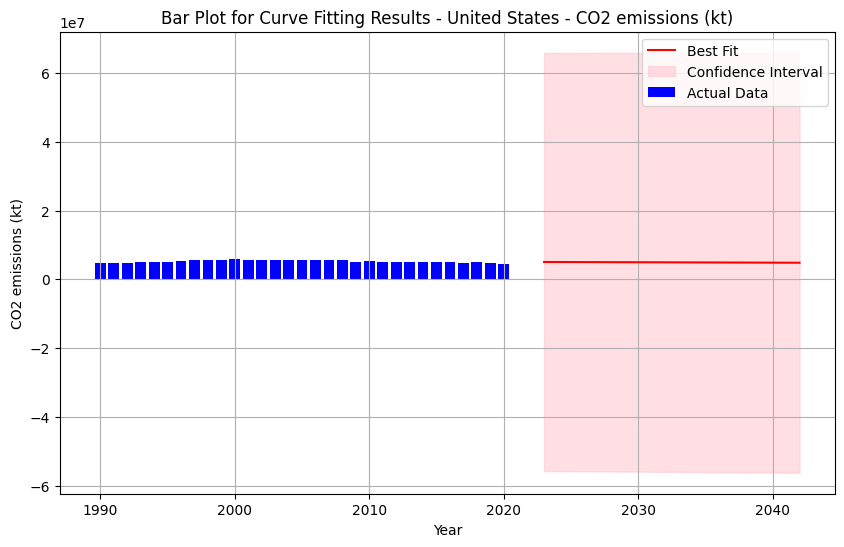

In [57]:
file_path = 'climate.csv'
df = pd.read_csv(file_path, skiprows=4)
selected_country = 'United States'
selected_indicator = 'CO2 emissions (kt)'
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df = df[columns_to_keep]
selected_data = df[(df['Country Name'] == selected_country) & (df['Indicator Name'] == selected_indicator)]
years = np.arange(1960, 2023)
values = selected_data.iloc[:, 4:].values.flatten()
mask = np.isfinite(values)
years_cleaned = years[mask]
values_cleaned = values[mask]
def model_func(x, a, b):
    return a * x + b
params, covariance = curve_fit(model_func, years_cleaned, values_cleaned)
future_years = np.arange(2023, 2043)
predicted_values = model_func(future_years, *params)
def err_ranges(covariance):
    p = 0.95  
    alpha = 1 - p
    n = len(values)
    dof = max(0, n - len(params))
    t_val = stats.t.ppf(1 - alpha / 2, dof)
    stderr = np.sqrt(np.diag(covariance))
    margin_err = t_val * stderr
    lower_bound = params - margin_err
    upper_bound = params + margin_err
    return lower_bound, upper_bound

lower_bound, upper_bound = err_ranges(covariance)


plt.figure(figsize=(10, 6))
plt.bar(years_cleaned, values_cleaned, label='Actual Data', color='blue')
plt.plot(future_years, predicted_values, label='Best Fit', color='red')
plt.fill_between(future_years, model_func(future_years, *lower_bound), model_func(future_years, *upper_bound), color='pink', alpha=0.5, label='Confidence Interval')
plt.title(f'Bar Plot for Curve Fitting Results - {selected_country} - {selected_indicator}')
plt.xlabel('Year')
plt.ylabel(selected_indicator)
plt.legend()
plt.grid(True)

plt.show()



c:\Users\hadi3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



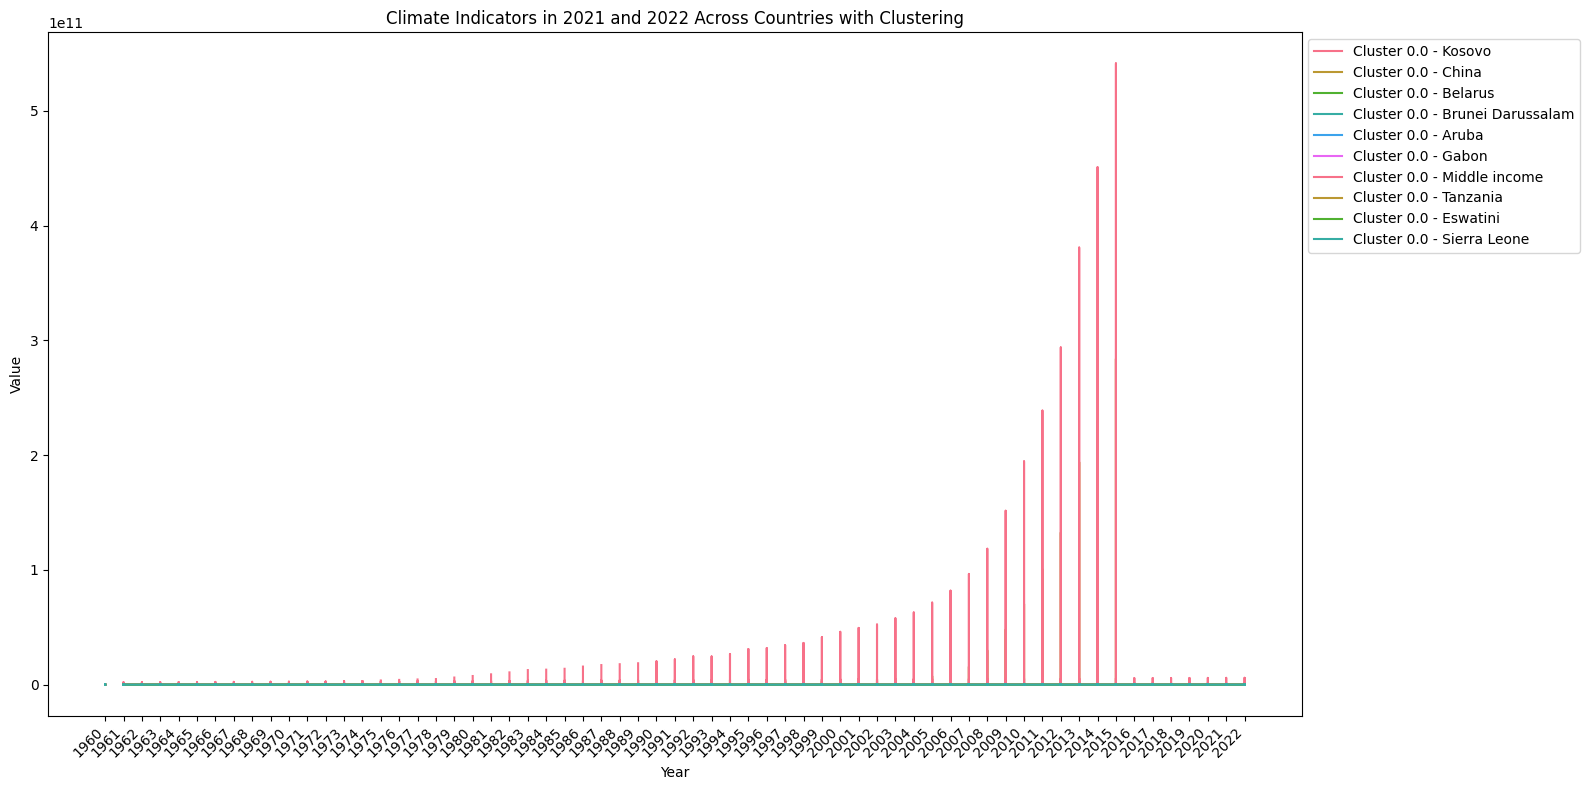

In [58]:
selected_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020','2021','2022']
selected_data = df[selected_columns]
selected_data_melted = pd.melt(selected_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                               var_name='Year', value_name='Value')

pivot_data = selected_data_melted.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value', aggfunc='first').fillna(0)
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_data)
selected_data_melted['Cluster'] = selected_data_melted['Country Name'].map(dict(zip(pivot_data.index.get_level_values(0), cluster_labels)))
plt.figure(figsize=(16, 8))
plt.title('Climate Indicators in 2021 and 2022 Across Countries with Clustering')
plt.xlabel('Year')
plt.ylabel('Value')
for cluster in selected_data_melted['Cluster'].unique():
    cluster_data = selected_data_melted[selected_data_melted['Cluster'] == cluster]
    countries_to_plot = random.sample(list(cluster_data['Country Name'].unique()), min(10, len(cluster_data['Country Name'].unique())))
    for country in countries_to_plot:
        country_data = cluster_data[cluster_data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], label=f'Cluster {cluster} - {country}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\hadi3\AppData\Local\Temp\ipykernel_21200\2975245562.py:32: UserWarning:

The figure layout has changed to tight



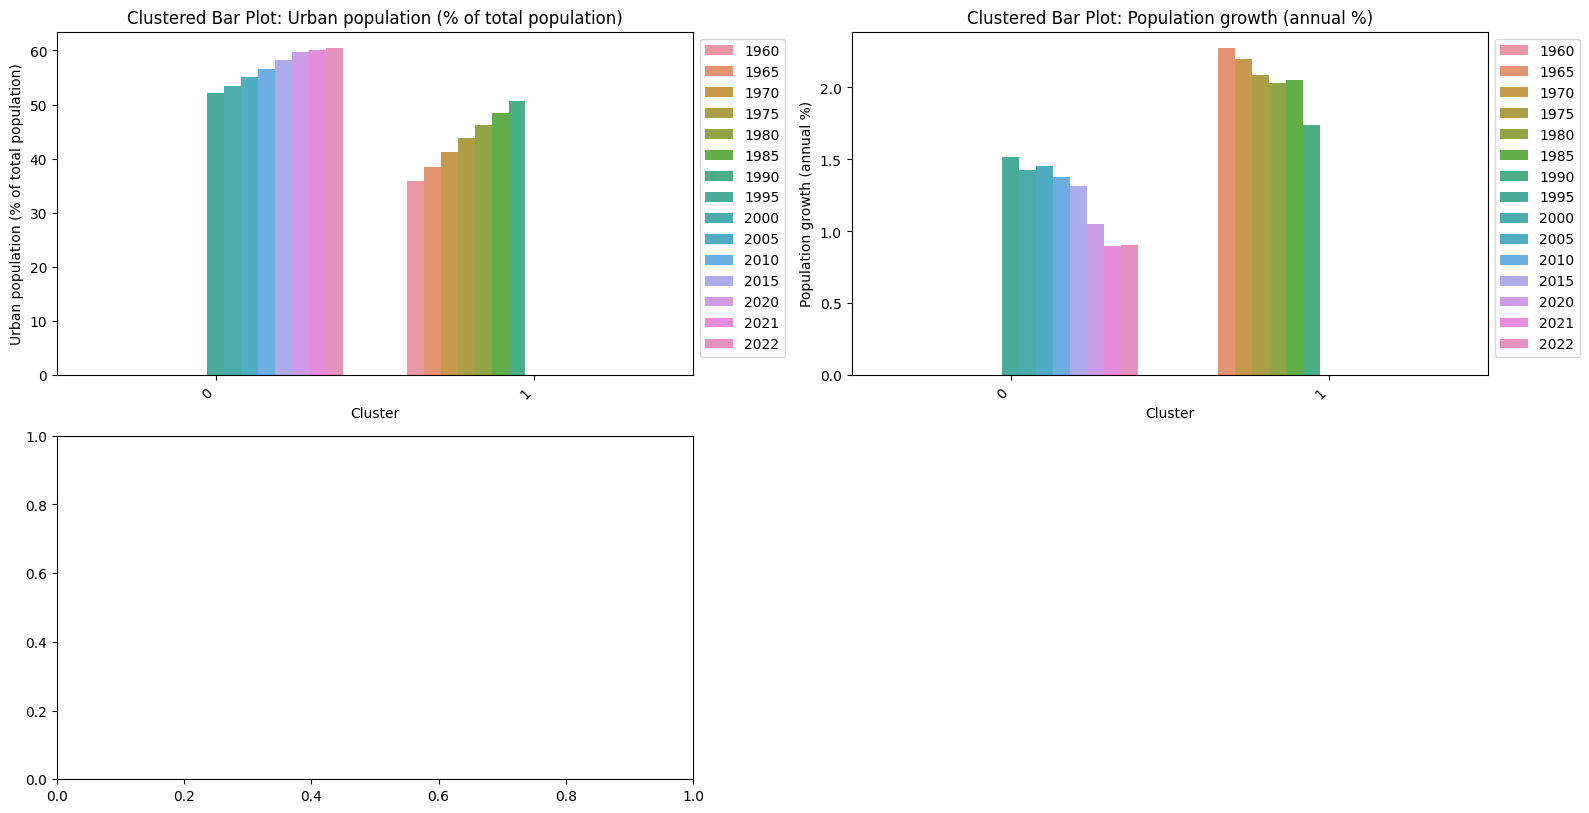

In [59]:
selected_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
                    '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995',
                    '2000', '2005', '2010', '2015', '2020', '2021', '2022']

selected_data = df[selected_columns]
pivot_df = selected_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                              var_name='Year', value_name='Value')
pivot_df.fillna(0, inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df[['Year', 'Value']])
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)
pivot_df['Cluster'] = cluster_labels
selected_indicators = ['Urban population (% of total population)', 'Population growth (annual %)', 'GDP growth (annual %)']

plt.figure(figsize=(16, 8))
sns.set_palette("husl") 

for i, indicator in enumerate(selected_indicators):
    plt.subplot(2, 2, i + 1)
    
    if not pivot_df[pivot_df['Indicator Name'] == indicator].empty:
        sns.barplot(x='Cluster', y='Value', hue='Year', 
                    data=pivot_df[pivot_df['Indicator Name'] == indicator], 
                    errorbar=None)  
        plt.title(f'Clustered Bar Plot: {indicator}')
        plt.xlabel('Cluster')
        plt.ylabel(indicator)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()

plt.show()
